In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/Train.csv")

In [7]:
df.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


We need at leas 10 entries for the time series, so we drop all groups with less than 13 entries

In [48]:
# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])
# Create empty lists to store train and test DataFrames
train_dfs = []
test_dfs = []
# Creating subsets of locations
location_groups = df.groupby('Place_ID')
# Filter out groups that have fewer than 13 unique dates
filtered_groups = {
    location: sub_df for location, sub_df in location_groups 
    if sub_df['Date'].nunique() >= 13
}
# Debug: Print number of filtered groups
print(f"Number of filtered groups (locations with >=13 unique dates): {len(filtered_groups)}")
# Iterate through each filtered group
for location, sub_df in filtered_groups.items():
    # Sort each subset DataFrame by the 'Date' column in ascending order
    sub_df = sub_df.sort_values(by='Date', ascending=True)
    # Debug: Check the number of rows in the sorted sub_df
    print(f"Location: {location}, Number of rows: {len(sub_df)}")
    # Select the last three rows for the test set
    test_df = sub_df.tail(3)
    # Select the remaining rows for the train set
    train_df = sub_df.iloc[:-3]
    # Debug: Verify the number of rows in train and test sets for this location
    print(f"Location: {location}, Train Rows: {len(train_df)}, Test Rows: {len(test_df)}")
    # Append the split dataframes to their respective lists
    train_dfs.append(train_df)
    test_dfs.append(test_df)
# Concatenate all the train and test DataFrames into separate DataFrames
df_train_split = pd.concat(train_dfs, ignore_index=True)
df_test_split = pd.concat(test_dfs, ignore_index=True)
# Display or use the resulting DataFrames
print("Training set:")
print(df_train_split.head())  # Display the first few rows for verification
print("\nTest set:")
print(df_test_split.head())   # Display the first few rows for verification
# Check the number of rows in the test set for each location to verify correctness
print("\nNumber of rows per Place_ID in the test set:")
print(df_test_split['Place_ID'].value_counts())




Number of filtered groups (locations with >=13 unique dates): 337
Location: 010Q650, Number of rows: 94
Location: 010Q650, Train Rows: 91, Test Rows: 3
Location: 05EC30X, Number of rows: 90
Location: 05EC30X, Train Rows: 87, Test Rows: 3
Location: 0DPWHX8, Number of rows: 94
Location: 0DPWHX8, Train Rows: 91, Test Rows: 3
Location: 0GBXTHY, Number of rows: 94
Location: 0GBXTHY, Train Rows: 91, Test Rows: 3
Location: 0HYPV1N, Number of rows: 94
Location: 0HYPV1N, Train Rows: 91, Test Rows: 3
Location: 0I2XREH, Number of rows: 65
Location: 0I2XREH, Train Rows: 62, Test Rows: 3
Location: 0KV6RJ1, Number of rows: 94
Location: 0KV6RJ1, Train Rows: 91, Test Rows: 3
Location: 0MGEY68, Number of rows: 94
Location: 0MGEY68, Train Rows: 91, Test Rows: 3
Location: 0O9R6AD, Number of rows: 92
Location: 0O9R6AD, Train Rows: 89, Test Rows: 3
Location: 0PP73FZ, Number of rows: 94
Location: 0PP73FZ, Train Rows: 91, Test Rows: 3
Location: 0RYZQUU, Number of rows: 91
Location: 0RYZQUU, Train Rows: 88, T

In [50]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [53]:


#  Sort the DataFrame by 'Place_ID' and 'Date' to ensure correct ordering
df_train_split = df_train_split.sort_values(by=['Place_ID', 'Date'])

#  Group the data by 'Place_ID' and apply the time series shift
df_train_split['lag1'] = df_train_split.groupby('Place_ID')['target'].shift(1)

#  Drop rows where 'log1' is NaN (the first row in each group)
df_train_split = df_train_split.dropna(subset=['lag1'])

#  Reset the index if needed (optional)
df_train_split = df_train_split.reset_index(drop=True)

# Display the final DataFrame
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.00006,11205.388333,0.000023,0.141557,230.936229,0.121261,-104.334066,29.181258,-73.896588,30.545446,0.021207,1061.570832,474.821444,841036.1929,-101.955931,29.21497,-73.914571,30.544513,0.000023,0.121261,-104.334066,29.181258,-73.896588,30.545446,0.000081,1.132571,383.692363,97258.462755,0.121555,6.246885,495.380407,96232.486418,-104.334066,29.181258,-73.896588,30.545446,0.279637,-0.777023,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000227,0.584522,0.00011,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

spearson correlation num - best 5 features - dont take lag 1

pearson categorical

location is a categorical one

check if the features are independent ?  (multicolinearity problem)

In [54]:
# Step 1: Exclude 'Place_ID' and 'Date' and select only numeric columns
numeric_df = df_train_split.drop(columns=['Place_ID', 'Date']).select_dtypes(include=['float64', 'int64'])

# Step 2: Pearson Correlation (linear relationship)
pearson_corr = numeric_df.corr(method='pearson')

# Order by absolute value of the correlation with target
pearson_corr_sorted = pearson_corr['target'].abs().sort_values(ascending=False)
print("Pearson Correlation with Target (Ordered by Absolute Value):")
print(pearson_corr_sorted)

# Step 3: Spearman Correlation (monotonic relationship)
spearman_corr = numeric_df.corr(method='spearman')

# Order by absolute value of the correlation with target
spearman_corr_sorted = spearman_corr['target'].abs().sort_values(ascending=False)
print("\nSpearman Correlation with Target (Ordered by Absolute Value):")
print(spearman_corr_sorted)

Pearson Correlation with Target (Ordered by Absolute Value):
target                                                 1.000000
lag1                                                   0.845201
target_min                                             0.817202
target_max                                             0.625163
L3_CO_CO_column_number_density                         0.400696
L3_HCHO_tropospheric_HCHO_column_number_density        0.349392
L3_HCHO_HCHO_slant_column_number_density               0.325234
L3_AER_AI_sensor_altitude                              0.312606
L3_NO2_NO2_slant_column_number_density                 0.312442
L3_CO_sensor_altitude                                  0.305908
L3_NO2_NO2_column_number_density                       0.301790
L3_NO2_tropospheric_NO2_column_number_density          0.285908
L3_AER_AI_solar_azimuth_angle                          0.191482
L3_O3_solar_azimuth_angle                              0.186823
L3_CLOUD_solar_azimuth_angle               

In [46]:
# Exclude 'target', 'log1', 'lag1', 'target_min', 'target_max'
excluded_features = ['target', 'log1', 'lag1', 'target_min', 'target_max']

# Filter the Pearson correlations excluding the specified features
filtered_features = pearson_corr_sorted.drop(excluded_features)

# Get the top 5 remaining features by Pearson correlation
top_5_filtered_features = filtered_features.index[:12]  # Get the next top 5 features
print("Top 7 features for linear regression model (excluding specified):", top_5_filtered_features)

Top 7 features for linear regression model (excluding specified): Index(['L3_CO_CO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density', 'L3_AER_AI_sensor_altitude',
       'L3_NO2_NO2_slant_column_number_density', 'L3_CO_sensor_altitude',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_AER_AI_solar_azimuth_angle', 'L3_O3_solar_azimuth_angle',
       'L3_CLOUD_solar_azimuth_angle', 'L3_HCHO_solar_azimuth_angle'],
      dtype='object')


FINDINGS PEARSON (TOP 7)

L3_CO_CO_column_number_density                         0.393221
L3_HCHO_tropospheric_HCHO_column_number_density        0.349700
L3_HCHO_HCHO_slant_column_number_density               0.325961
L3_AER_AI_sensor_altitude                              0.316445
L3_NO2_NO2_slant_column_number_density                 0.312890
L3_CO_sensor_altitude                                  0.311183
L3_NO2_NO2_column_number_density                       0.302320

FINDING SPEARSON (TOP 7)

L3_AER_AI_sensor_altitude                              0.387518
L3_HCHO_tropospheric_HCHO_column_number_density        0.387201
L3_CO_sensor_altitude                                  0.378116
L3_NO2_tropospheric_NO2_column_number_density          0.375973
L3_HCHO_HCHO_slant_column_number_density               0.370443
L3_CO_CO_column_number_density                         0.348571
L3_NO2_NO2_column_number_density                       0.334212



Scenario 1:
Pearson = 0.85, Spearman = 0.88: Both show a strong correlation, likely a linear relationship.

Scenario 2:
Pearson = 0.30, Spearman = 0.80: The relationship is likely non-linear but still monotonic (curved trend).

Scenario 3:
Pearson = 0.80, Spearman = 0.40: There may be outliers or rank inconsistencies affecting Spearman's result.

1. L3_AER_AI_sensor_altitude  = Spearson 0.387518 Pearson 0.316445
2. L3_HCHO_tropospheric_HCHO_column_number_density = SP 0.387201 Pearson 0.349700
3. L3_CO_sensor_altitude = SP 0.378116 > P 0.311183
4. L3_HCHO_HCHO_slant_column_number_density    = SP 0.370443 > 0.325961
5. L3_CO_CO_column_number_density = SP 0.348571 < P 0.393221

Based on your provided list, after excluding the specified features, the next top features are:

L3_CO_CO_column_number_density: Pearson = 0.393
L3_HCHO_tropospheric_HCHO_column_number_density: Pearson = 0.350
L3_HCHO_HCHO_slant_column_number_density: Pearson = 0.326
L3_AER_AI_sensor_altitude: Pearson = 0.316
L3_NO2_NO2_slant_column_number_density: Pearson = 0.313

These features have strong linear correlations with the target and can be good predictors for your regression model.

In [57]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.00006,11205.388333,0.000023,0.141557,230.936229,0.121261,-104.334066,29.181258,-73.896588,30.545446,0.021207,1061.570832,474.821444,841036.1929,-101.955931,29.21497,-73.914571,30.544513,0.000023,0.121261,-104.334066,29.181258,-73.896588,30.545446,0.000081,1.132571,383.692363,97258.462755,0.121555,6.246885,495.380407,96232.486418,-104.334066,29.181258,-73.896588,30.545446,0.279637,-0.777023,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000227,0.584522,0.00011,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0


Correlation Matrix:
                                                 L3_CO_CO_column_number_density   
L3_CO_CO_column_number_density                                         1.000000  \
L3_HCHO_tropospheric_HCHO_column_number_density                        0.278395   
L3_HCHO_HCHO_slant_column_number_density                               0.351523   
L3_AER_AI_sensor_altitude                                             -0.415473   
L3_NO2_NO2_slant_column_number_density                                 0.182115   

                                                 L3_HCHO_tropospheric_HCHO_column_number_density   
L3_CO_CO_column_number_density                                                          0.278395  \
L3_HCHO_tropospheric_HCHO_column_number_density                                         1.000000   
L3_HCHO_HCHO_slant_column_number_density                                                0.895815   
L3_AER_AI_sensor_altitude                                                        

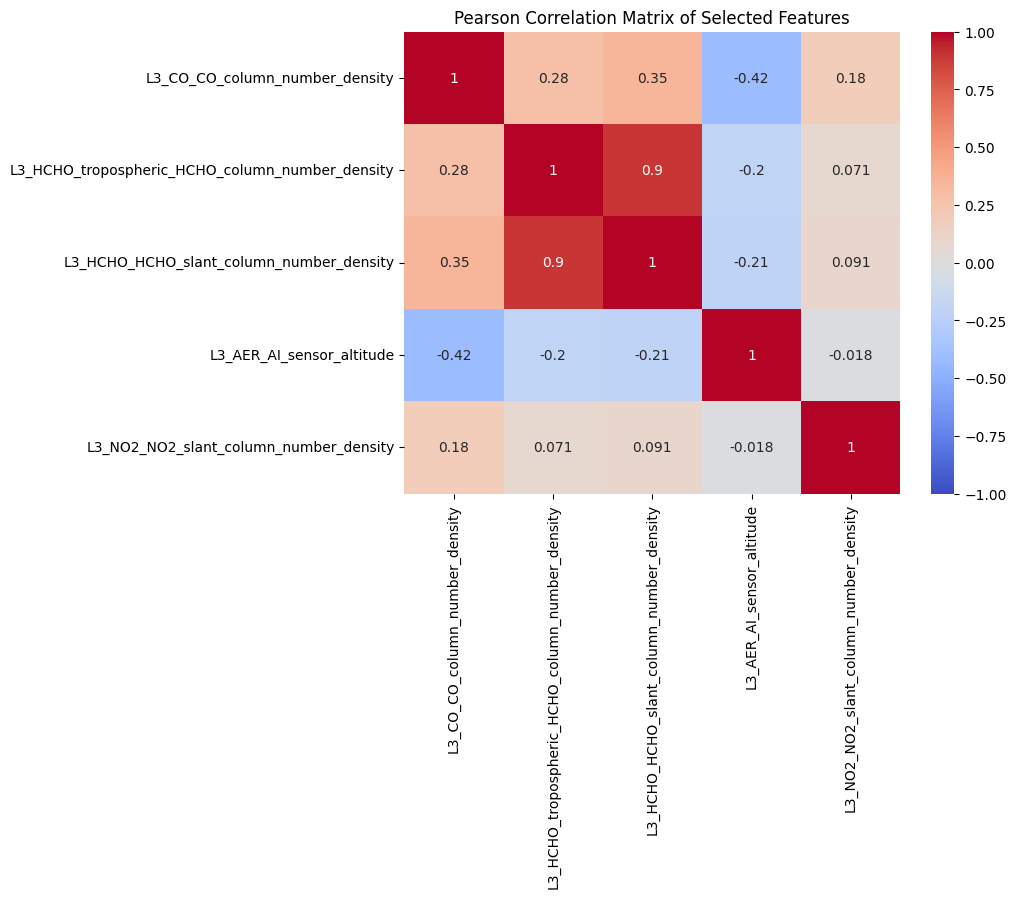

In [38]:
# Select the 5 features for testing independence
features_to_test = df_train_split[['L3_CO_CO_column_number_density', 
                                   'L3_HCHO_tropospheric_HCHO_column_number_density',
                                   'L3_HCHO_HCHO_slant_column_number_density', 
                                   'L3_AER_AI_sensor_altitude', 
                                   'L3_NO2_NO2_slant_column_number_density']]

# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = features_to_test.corr(method='pearson')

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix of Selected Features')
plt.show()

Key Insights:
L3_HCHO_tropospheric_HCHO_column_number_density and L3_HCHO_HCHO_slant_column_number_density have a high correlation of 0.90.
This indicates strong multicollinearity between these two features. These features are not independent, and including both in a linear regression model may cause multicollinearity problems. You might want to consider removing one of them.

DROP, column number density and exchange with our top 6 list L3_AER_AI_solar_azimuth_angle

Correlation Matrix:
                                                 L3_CO_CO_column_number_density   
L3_CO_CO_column_number_density                                         1.000000  \
L3_HCHO_tropospheric_HCHO_column_number_density                        0.278395   
L3_AER_AI_solar_azimuth_angle                                         -0.199581   
L3_AER_AI_sensor_altitude                                             -0.415473   
L3_NO2_NO2_slant_column_number_density                                 0.182115   

                                                 L3_HCHO_tropospheric_HCHO_column_number_density   
L3_CO_CO_column_number_density                                                          0.278395  \
L3_HCHO_tropospheric_HCHO_column_number_density                                         1.000000   
L3_AER_AI_solar_azimuth_angle                                                          -0.119250   
L3_AER_AI_sensor_altitude                                                        

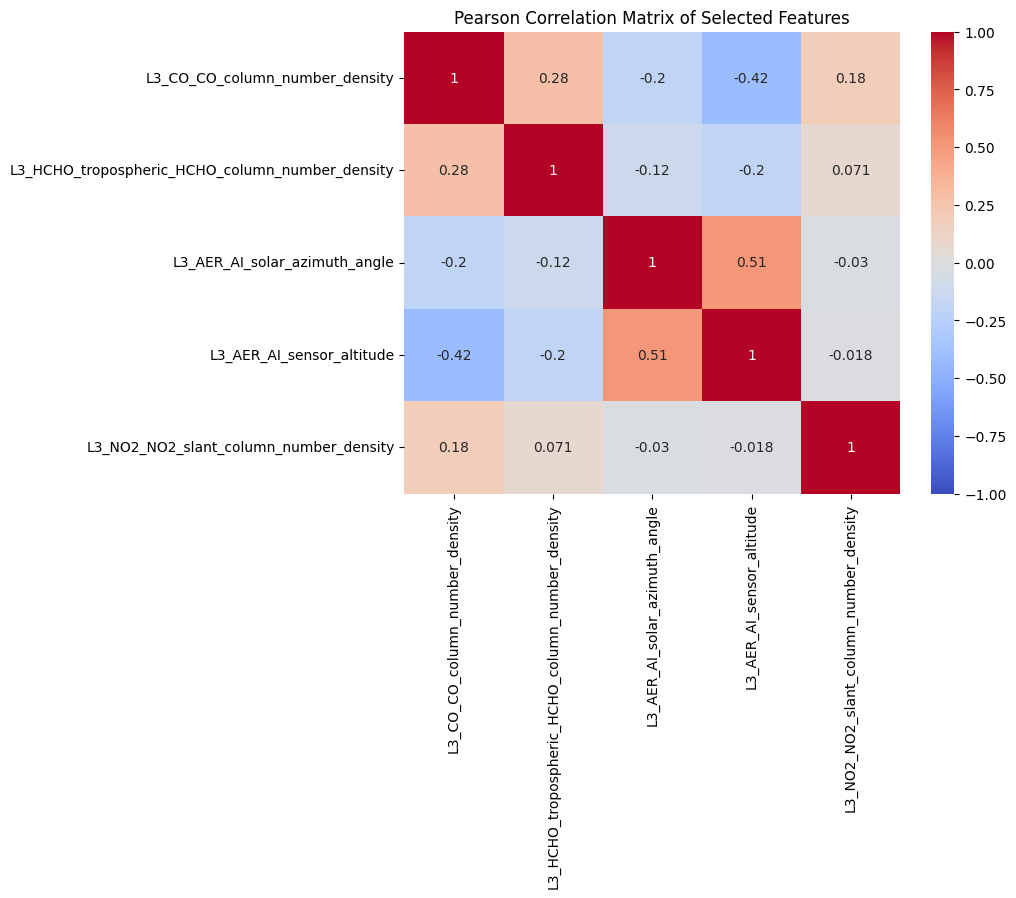

In [45]:
# Select the 5 features for testing independence
features_to_test = df_train_split[['L3_CO_CO_column_number_density', 
                                   'L3_HCHO_tropospheric_HCHO_column_number_density',
                                   'L3_AER_AI_solar_azimuth_angle', 
                                   'L3_AER_AI_sensor_altitude', 
                                   'L3_NO2_NO2_slant_column_number_density']]

# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = features_to_test.corr(method='pearson')

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix of Selected Features')
plt.show()

These two features have a moderate positive correlation of 0.51. While not a severe case of multicollinearity, a correlation above 0.5 suggests that these features share some linear relationship. You may want to monitor this or consider using one of them, depending on your model's needs.



In [55]:
num_features = df_train_split[['L3_CO_CO_column_number_density', 
                                   'L3_HCHO_tropospheric_HCHO_column_number_density',
                                   'L3_AER_AI_solar_azimuth_angle', 
                                   'L3_AER_AI_sensor_altitude', 
                                   'L3_NO2_NO2_slant_column_number_density']]

In [56]:
cat_features = df_train_split[["Place_ID"]]

Steps for Model
1. Standardize or Normalize numerical features
2. Baseline Linear regression
3. Handle Grouping by Location
        Include it as a categorical feature by encoding it.
        Train separate models for each location (if you want to analyze each group separately).
4. Train-Test Split:
Ensure that the train-test split is stratified by Location_ID, especially if your data has time-series characteristics or if locations should not overlap between training and test sets.


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Step 1: Separate features into categorical and numerical
categorical_features = df_train_split['Place_ID']  # Add any other categorical features
numerical_features = df_train_split[['L3_CO_CO_column_number_density', 
                                   'L3_HCHO_tropospheric_HCHO_column_number_density',
                                   'L3_AER_AI_solar_azimuth_angle', 
                                   'L3_AER_AI_sensor_altitude', 
                                   'L3_NO2_NO2_slant_column_number_density']]

# Step 2: Preprocess the data
# OneHotEncoder for categorical features, StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Step 3: Create a pipeline that first transforms the data and then applies linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 4: Define X (features) and y (target)
X = df_train_split.drop(columns=['target'])
y = df_train_split['target']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit the model
pipeline.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed